Dataset Head:
   Temparature  Humidity  Moisture Soil Type  Crop Type  Nitrogen  Potassium  \
0           26        52        38     Sandy      Maize        37          0   
1           29        52        45     Loamy  Sugarcane        12          0   
2           34        65        62     Black     Cotton         7          9   
3           32        62        34       Red    Tobacco        22          0   
4           28        54        46    Clayey      Paddy        35          0   

   Phosphorous Fertilizer Name  
0            0            Urea  
1           36             DAP  
2           30        14-35-14  
3           20           28-28  
4            0            Urea  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moist

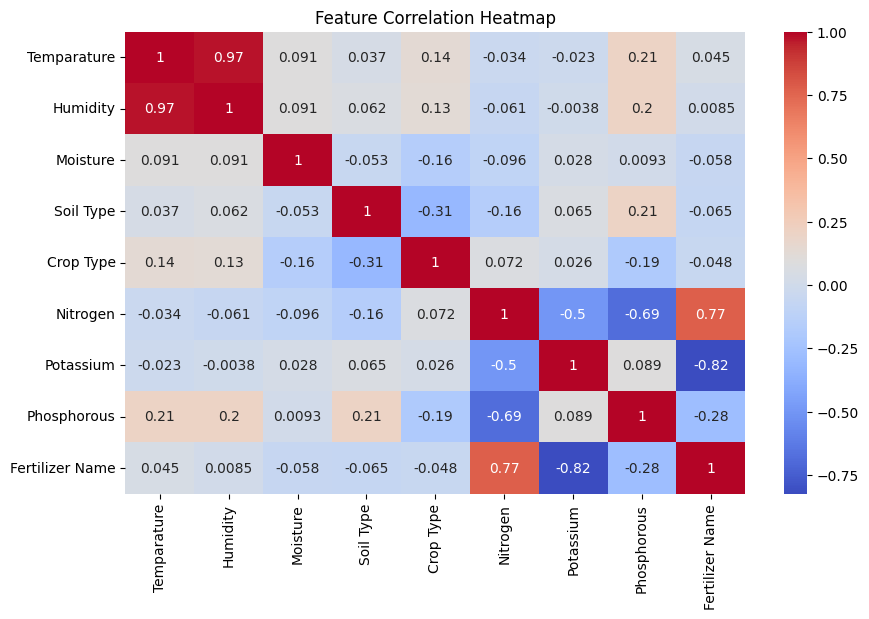

Decision Tree Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20


Confusion Matrix:
[[2 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 5 0 0]
 [0 0 0 0 5 0]
 [0 0 0 0 0 6]]


C:\Users\parth\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.0928 - loss: 1.9897 - val_accuracy: 0.0500 - val_loss: 1.9722
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2028 - loss: 1.8852 - val_accuracy: 0.1000 - val_loss: 1.9223
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4345 - loss: 1.8013 - val_accuracy: 0.1500 - val_loss: 1.8841
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5783 - loss: 1.7366 - val_accuracy: 0.2000 - val_loss: 1.8378
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5511 - loss: 1.6726 - val_accuracy: 0.2500 - val_loss: 1.7832
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6681 - loss: 1.5864 - val_accuracy: 0.2500 - val_loss: 1.7309
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6488 - loss: 1.5173 - val_accuracy: 0.2500 - val_loss: 1.6692
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6738 - loss: 1.4049 - val_accuracy: 0.5500 - v

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load dataset
file_path = r"C:\Users\parth\Downloads\FARMIFY - PROJECT\fertilisers\Fertilizer Prediction.csv"
df = pd.read_csv(file_path)

# Clean column names (remove extra spaces)
df.columns = df.columns.str.strip()

# Exploratory Data Analysis (EDA)
print("Dataset Head:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

# Encoding categorical features if necessary
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Visualizing correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Correct target variable name
X = df.drop(columns=['Fertilizer Name'])
y = df['Fertilizer Name']

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Convert Decision Tree model to Keras Model
keras_model = Sequential()
keras_model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
keras_model.add(Dense(32, activation='relu'))
keras_model.add(Dense(len(np.unique(y)), activation='softmax'))  # Output layer

keras_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
keras_model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test))

# Save the trained Keras model
keras_model.save("fertilizer_recommendation_model.keras")
print("Keras model saved as 'fertilizer_recommendation_model.keras'")

In [3]:
print(df.columns)



Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')


In [5]:
X = df.drop(columns=['Fertilizer Name'])


In [6]:
df.columns = df.columns.str.strip()


In [7]:
print(df.columns)


Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')


In [8]:
print(df.columns)


Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')


In [9]:
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])


In [10]:
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Ensure Fertilizer Name is included
if 'Fertilizer Name' not in label_encoders:
    label_encoders['Fertilizer Name'] = LabelEncoder()
    label_encoders['Fertilizer Name'].fit(df['Fertilizer Name'])


In [11]:
print("Available Encoders:", label_encoders.keys())


Available Encoders: dict_keys(['Soil Type', 'Crop Type', 'Fertilizer Name'])
